In [7]:
library(tidyverse)
library(cowplot)
library(ggplot2)


In [8]:
df <- read_csv("../data/barley.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  yield = col_double(),
  variety = col_character(),
  year = col_double(),
  site = col_character()
)



In [9]:
head(df)

X1,yield,variety,year,site
<dbl>,<dbl>,<chr>,<dbl>,<chr>
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids
5,28.96667,Manchuria,1931,Duluth


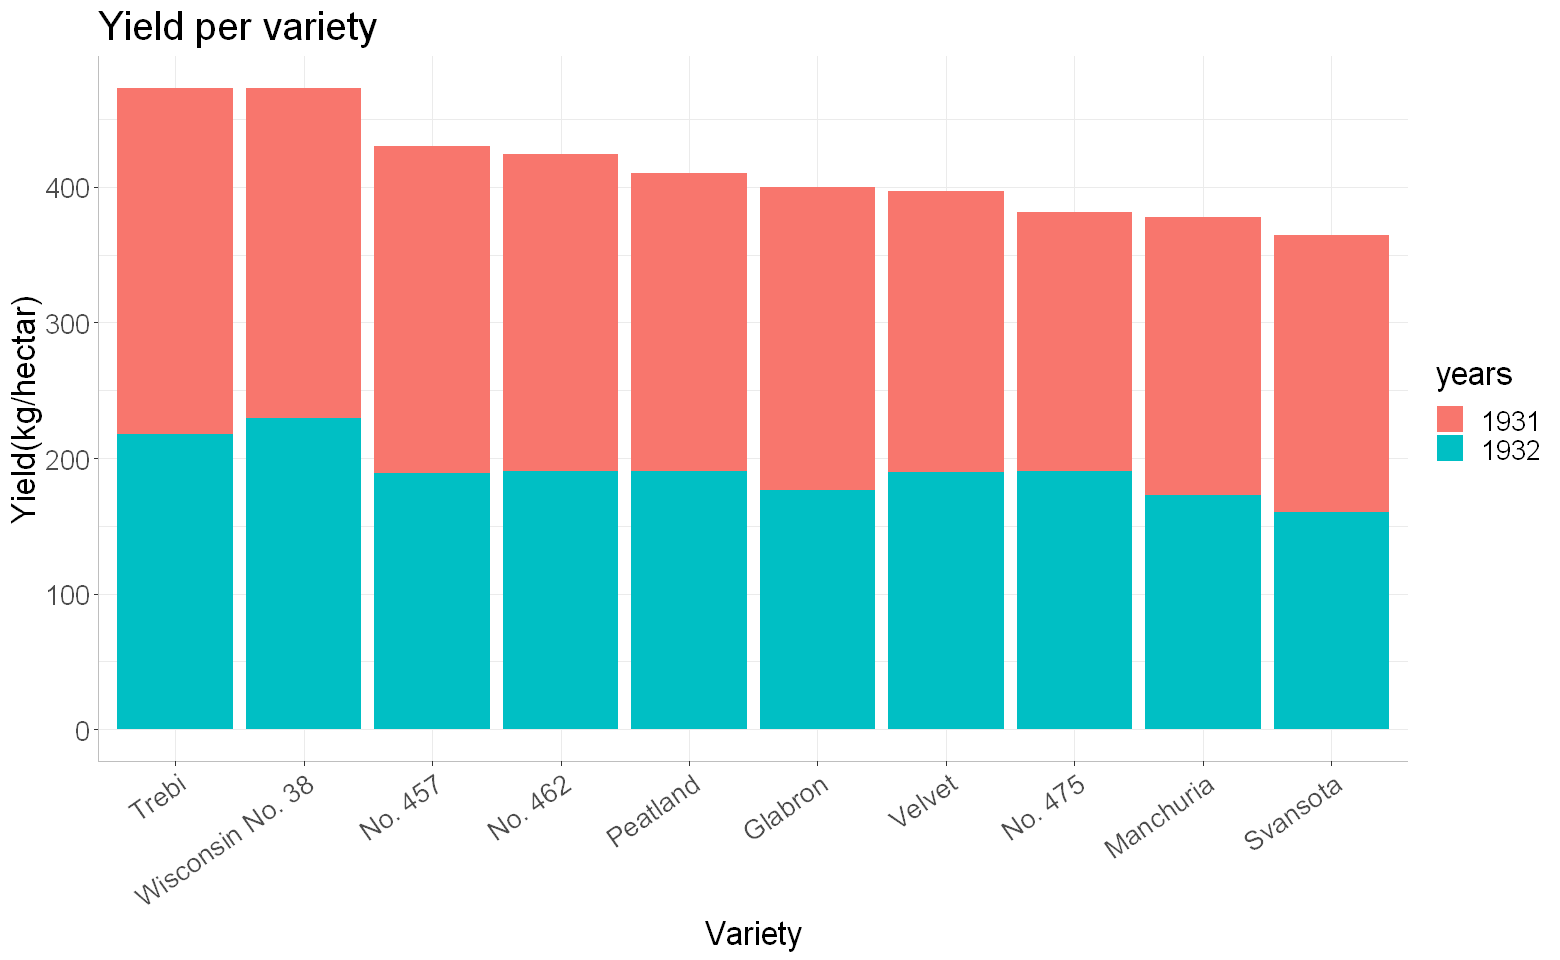

In [18]:
options(repr.plot.width = 13, repr.plot.height = 8)

#plot yield per variety

df %>%
    ggplot(aes(x=reorder(as.factor(variety), -yield), y=yield, fill = as.factor(year))) +
    geom_bar(stat = 'identity', position = "stack") +
    theme_bw() + 
    scale_fill_discrete(name = "years") +
    xlab("Variety") +
    ylab("Yield(kg/hectar)") +
    ggtitle("Yield per variety") +
    theme(axis.line = element_line(colour = "gray"),
          panel.border = element_blank(),
          text = element_text(size=20),
          axis.text.x = element_text(angle = 35, hjust = 1)
          )

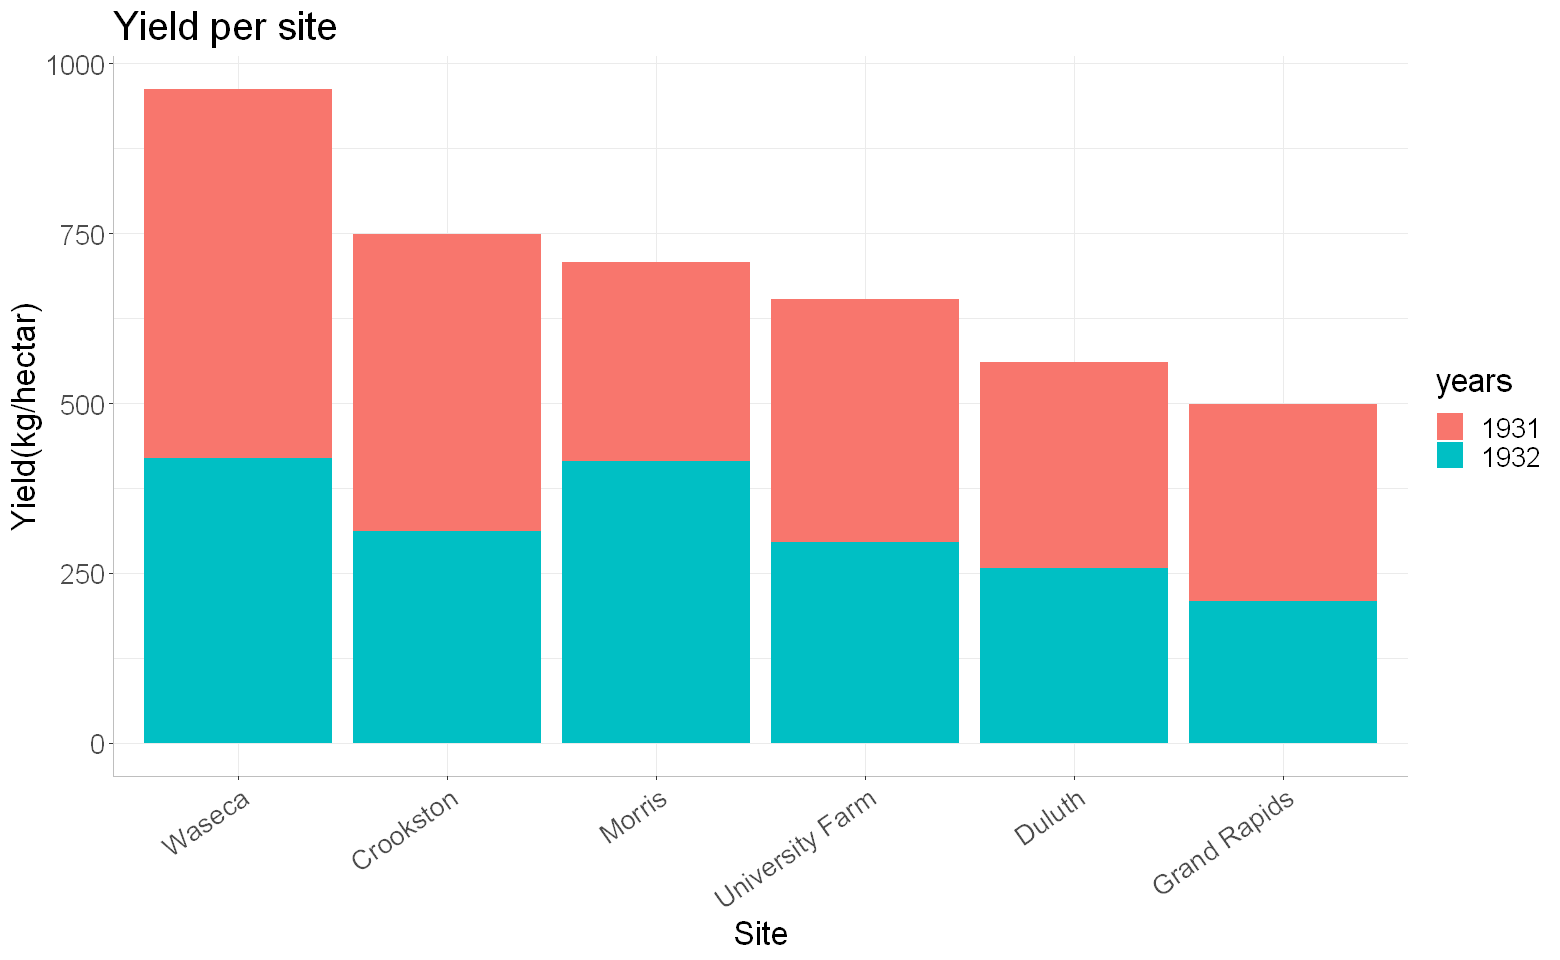

In [11]:
options(repr.plot.width = 13, repr.plot.height = 8)

# plot yield per site

df %>%
    ggplot(aes(x=reorder(as.factor(site), -yield), y=yield, fill = as.factor(year))) +
    geom_bar(stat = 'identity', position = "stack") +
    theme_bw() + 
    scale_fill_discrete(name = "years") +
    xlab("Site") +
    ylab("Yield(kg/hectar)") +
    ggtitle("Yield per site") +
    theme(axis.line = element_line(colour = "gray"),
          panel.border = element_blank(),
          text = element_text(size=20),
          axis.text.x = element_text(angle = 35, hjust = 1)
          )

In [70]:
my_df_sum <- df %>%
    group_by(site, variety) %>%
    summarize(yield = sum(yield))

my_df_agg <- my_df_sum %>%
    summarise(yield = max(yield))

my_max <- merge(my_df_agg, my_df_sum)

my_max

site,yield,variety
<chr>,<dbl>,<chr>
Crookston,88.76666,Trebi
Duluth,64.53333,Trebi
Grand Rapids,61.46667,Peatland
Morris,90.40000,Trebi
University Farm,79.86666,Glabron
Waseca,116.96667,Wisconsin No. 38


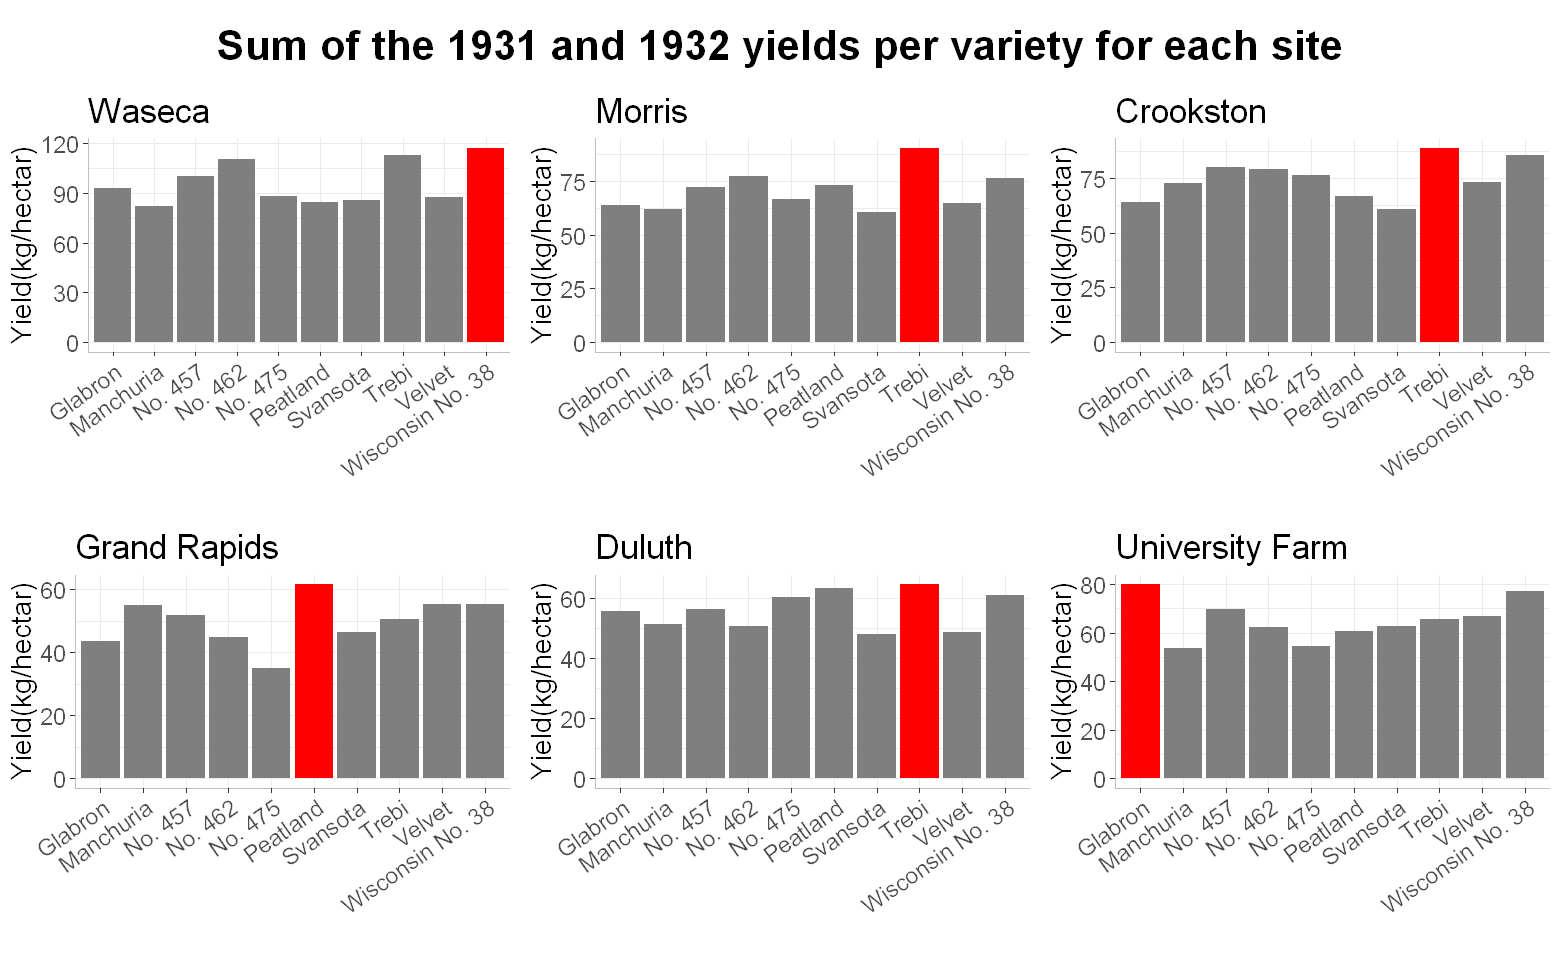

In [13]:
options(repr.plot.width = 13, repr.plot.height = 8)

#plot yield per variety per site

l=list();
i<-1
for (sites in c("Waseca", "Morris", "Crookston", "Grand Rapids", "Duluth", "University Farm")){
    max <- filter(my_max, site==sites)$variety
    df_max <- df %>% mutate( ToHighlight = ifelse( variety == max, "yes", "no" ) )
    plot <- df_max %>%
    filter(site == sites) %>%
    ggplot(aes(x=as.factor(variety), y=yield, fill=ToHighlight)) +
    geom_bar(stat = 'identity', position = "stack") +
    theme_bw() + 
    scale_fill_manual( values = c( "yes"="red", "no"="grey50", guide = FALSE)) +
    xlab("")+
    ylab("Yield(kg/hectar)") +
    ggtitle(sites) +
    theme(axis.line = element_line(colour = "gray"),
          panel.border = element_blank(),
          text = element_text(size=17),
          axis.text.x = element_text(angle = 35, hjust = 1),
          legend.position = "none"
          )
    l[[i]] <- plot
    i <- i + 1
    plot
}

p <- plot_grid(l[[1]], l[[2]],l[[3]], l[[4]], l[[5]], l[[6]])
title <- ggdraw() + draw_label("Sum of the 1931 and 1932 yields per variety for each site", fontface='bold', size = 25)
plot_grid(title, p, ncol=1, rel_heights=c(0.1, 1))



site,yield,variety
<chr>,<dbl>,<chr>
Crookston,88.76666,Trebi
Duluth,64.53333,Trebi
Grand Rapids,61.46667,Peatland
Morris,90.40000,Trebi
University Farm,79.86666,Glabron
Waseca,116.96667,Wisconsin No. 38


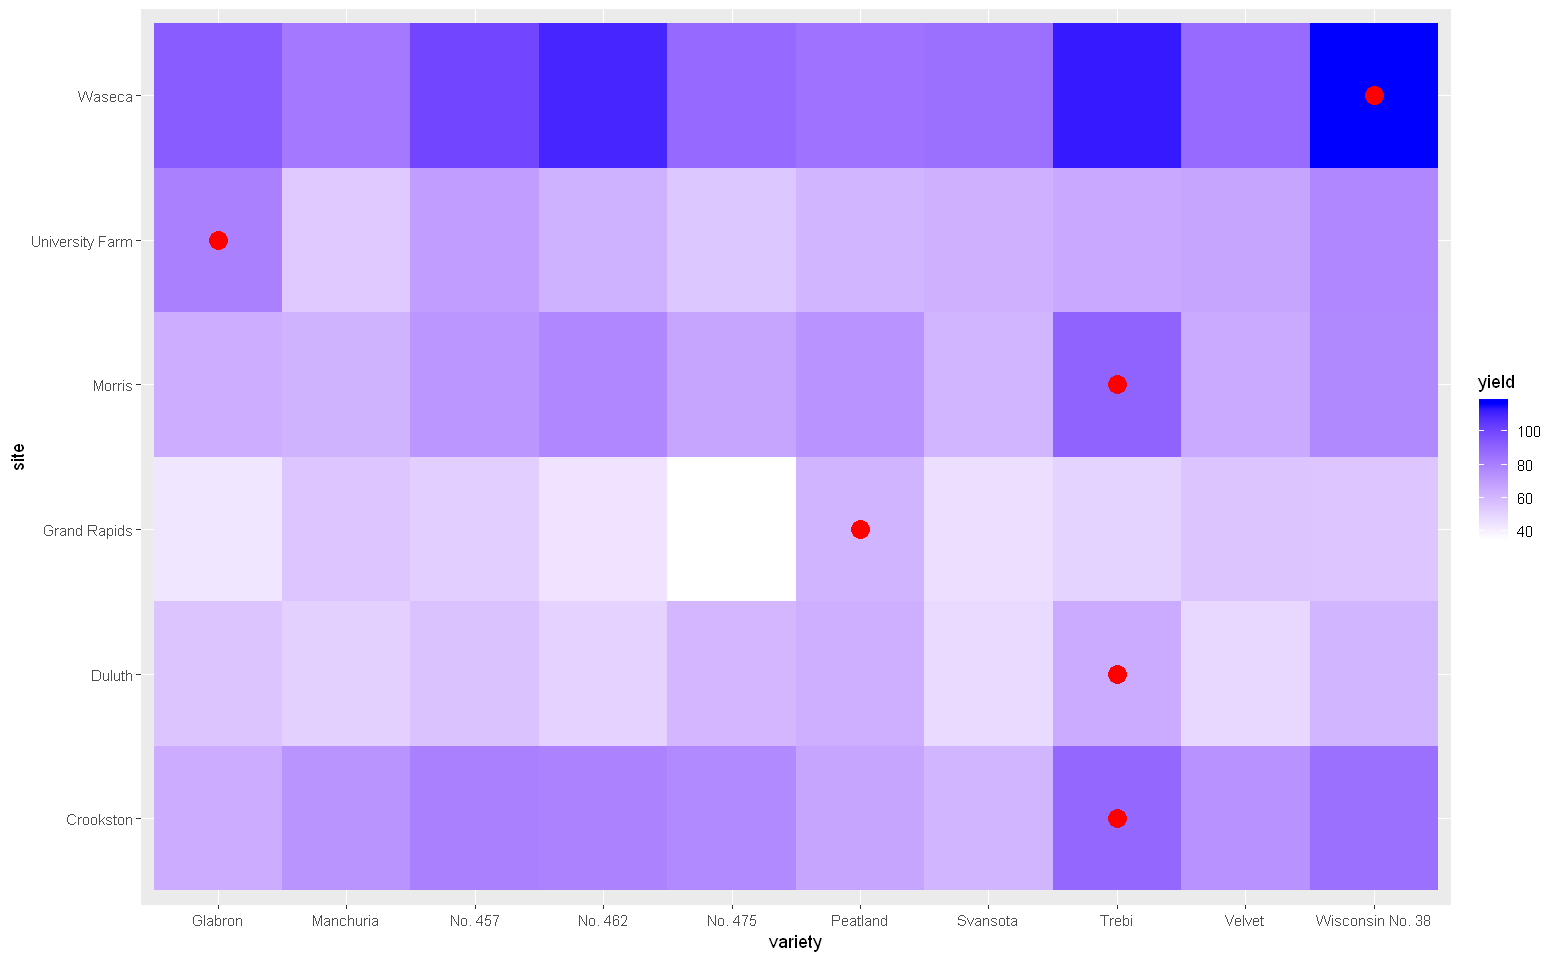

In [69]:
max_points <- tibble(
    lon = c(1, 2, 3, 4, 5, 6),
    lat = c(1, 3, 6, 7, 8, 3)
  )

max_points_t <- as.data.frame(max_points)

head(my_max)

ggplot(data = my_df_sum, aes(variety, site, fill= yield)) + 
  geom_tile() +
scale_fill_gradient(low="white", high="blue") +
geom_point(aes(x = c(8), y = c(1)), color = 'red', size = 5) +
geom_point(aes(x = c(8), y = c(2)), color = 'red', size = 5) +
geom_point(aes(x = c(6), y = c(3)), color = 'red', size = 5) +
geom_point(aes(x = c(8), y = c(4)), color = 'red', size = 5) +
geom_point(aes(x = c(1), y = c(5)), color = 'red', size = 5) +
geom_point(aes(x = c(10), y = c(6)), color = 'red', size = 5)